In [1]:
import numpy as np


np.random.seed(42)

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
dataset = fetch_california_housing()

In [4]:
x = dataset.data[:, :]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef:\n{regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef:
[ 4.45822565e-01  9.68186799e-03 -1.22095112e-01  7.78599557e-01
 -7.75740400e-07 -3.37002667e-03 -4.18536747e-01 -4.33687976e-01]
Intercept: -37.056241331525015
R2-Score: 0.5957702326061662


#### Visualization

In [6]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

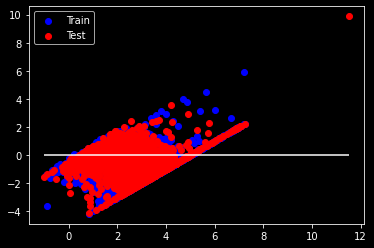

In [7]:
plot_residuals(regr, x_train, y_train, x_test, y_test)